In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [5]:
cities

['busselton',
 'tsihombe',
 'bryan',
 'alofi',
 'avarua',
 'torbay',
 'thompson',
 'palmer',
 'saint-philippe',
 'clyde river',
 'ushuaia',
 'illoqqortoormiut',
 'barentsburg',
 'bredasdorp',
 'galveston',
 'rikitea',
 'georgetown',
 'gold coast',
 'kapaa',
 'sentyabrskiy',
 'cape town',
 'vaini',
 'khatanga',
 'punta arenas',
 'pisco',
 'vaitupu',
 'mahebourg',
 'ahipara',
 'mataura',
 'chuy',
 'albany',
 'uthal',
 'nyurba',
 'solwezi',
 'taft',
 'cidreira',
 'hilo',
 'chokurdakh',
 'noumea',
 'japura',
 'tenancingo',
 'severo-kurilsk',
 'overyata',
 'port hardy',
 'ribeira grande',
 'hihifo',
 'maldonado',
 'marcona',
 'ovsyanka',
 'saint-augustin',
 'waipawa',
 'zharkovskiy',
 'huarmey',
 'petropavlovka',
 'fuente de oro',
 'hermanus',
 'saint george',
 'kodiak',
 'dikson',
 'port macquarie',
 'belushya guba',
 'hithadhoo',
 'atuona',
 'yellowknife',
 'karaton',
 'tecoanapa',
 'sao felix do xingu',
 'goure',
 'lavrentiya',
 'luwuk',
 'castro',
 'jiayuguan',
 'pucallpa',
 'kavaratti'

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
key = weather_api_key

In [18]:
# Starting URL for weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?&appid="+ key

In [20]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [24]:
# make a get request
city_weather = requests.get(city_url)
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":276.1,"feels_like":272.1,"temp_min":274.26,"temp_max":277.59,"pressure":1004,"humidity":87},"visibility":10000,"wind":{"speed":3.09,"deg":300},"clouds":{"all":90},"dt":1612577100,"sys":{"type":1,"id":3486,"country":"US","sunrise":1612525995,"sunset":1612562598},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [25]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 276.1,
  'feels_like': 272.1,
  'temp_min': 274.26,
  'temp_max': 277.59,
  'pressure': 1004,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 300},
 'clouds': {'all': 90},
 'dt': 1612577100,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1612525995,
  'sunset': 1612562598},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [27]:
# Get JSON data
boston_data = city_weather.json()

In [28]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1612525995,
 'sunset': 1612562598}

In [29]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 277.59 87 90 3.09


In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [47]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | bryan
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | palmer
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | galveston
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | gold coast
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Pr

Processing Record 41 of Set 4 | tautira
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | ganserndorf
Processing Record 44 of Set 4 | pacifica
Processing Record 45 of Set 4 | shimoda
Processing Record 46 of Set 4 | eyl
Processing Record 47 of Set 4 | saint-leger
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 4 | belmonte
Processing Record 1 of Set 5 | baykalovo
Processing Record 2 of Set 5 | lujan
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | san quintin
Processing Record 5 of Set 5 | yeppoon
Processing Record 6 of Set 5 | tagusao
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | desaguadero
Processing Record 10 of Set 5 | anadyr
Processing Record 11 of Set 5 | price
Processing Record 12 of Set 5 | hamilton
Processing Record 13 of Set 5 | hasaki
Processing Recor

Processing Record 32 of Set 8 | vostok
Processing Record 33 of Set 8 | kaniama
Processing Record 34 of Set 8 | yerofey pavlovich
Processing Record 35 of Set 8 | kenai
Processing Record 36 of Set 8 | grosseto
Processing Record 37 of Set 8 | lysyye gory
Processing Record 38 of Set 8 | kribi
Processing Record 39 of Set 8 | lata
Processing Record 40 of Set 8 | nhulunbuy
Processing Record 41 of Set 8 | asilah
Processing Record 42 of Set 8 | phan thiet
Processing Record 43 of Set 8 | jining
Processing Record 44 of Set 8 | presidencia roque saenz pena
Processing Record 45 of Set 8 | bima
Processing Record 46 of Set 8 | rio gallegos
Processing Record 47 of Set 8 | novo aripuana
Processing Record 48 of Set 8 | banganapalle
Processing Record 49 of Set 8 | le port
Processing Record 50 of Set 8 | jinchang
Processing Record 1 of Set 9 | margate
Processing Record 2 of Set 9 | tabou
Processing Record 3 of Set 9 | vuktyl
Processing Record 4 of Set 9 | dumai
Processing Record 5 of Set 9 | kaitangata
Pr

Processing Record 21 of Set 12 | fukue
Processing Record 22 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 12 | cattolica
Processing Record 24 of Set 12 | wharton
Processing Record 25 of Set 12 | puerto baquerizo moreno
Processing Record 26 of Set 12 | iisalmi
Processing Record 27 of Set 12 | pirgos
Processing Record 28 of Set 12 | alcaniz
Processing Record 29 of Set 12 | uptar
Processing Record 30 of Set 12 | naftah
City not found. Skipping...
Processing Record 31 of Set 12 | umm lajj
Processing Record 32 of Set 12 | jumla
Processing Record 33 of Set 12 | bargal
City not found. Skipping...
Processing Record 34 of Set 12 | ganzhou
Processing Record 35 of Set 12 | kysyl-syr
Processing Record 36 of Set 12 | silvan
Processing Record 37 of Set 12 | pangai
Processing Record 38 of Set 12 | kontagora
Processing Record 39 of Set 12 | ust-kut
Processing Record 40 of Set 12 | ivankiv
Processing Record 41 of Set 12 | fuerte olimpo
Processing Record 42 of Set 12 | gorontalo
Proc

In [48]:
len(city_data)

561

In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,293.15,66,100,1.34,AU,2021-02-06 03:45:37
1,Bryan,30.6744,-96.3700,281.15,81,1,3.52,US,2021-02-06 03:47:34
2,Alofi,-19.0595,-169.9187,300.15,83,100,5.14,NU,2021-02-06 03:45:24
3,Avarua,-21.2078,-159.7750,302.15,70,40,4.12,CK,2021-02-06 03:45:31
4,Torbay,47.6666,-52.7314,274.26,100,90,11.83,CA,2021-02-06 03:45:39
5,Thompson,55.7435,-97.8558,242.15,69,40,6.17,CA,2021-02-06 03:45:27
6,Palmer,42.1584,-72.3287,270.93,86,1,2.47,US,2021-02-06 03:49:04
7,Saint-Philippe,-21.3585,55.7679,302.15,61,0,1.54,RE,2021-02-06 03:49:04
8,Clyde River,70.4692,-68.5914,247.15,84,90,1.54,CA,2021-02-06 03:45:25
9,Ushuaia,-54.8000,-68.3000,280.15,76,40,9.77,AR,2021-02-06 03:45:04


In [54]:
new_clm_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_clm_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-02-06 03:45:37,-33.6500,115.3333,293.15,66,100,1.34
1,Bryan,US,2021-02-06 03:47:34,30.6744,-96.3700,281.15,81,1,3.52
2,Alofi,NU,2021-02-06 03:45:24,-19.0595,-169.9187,300.15,83,100,5.14
3,Avarua,CK,2021-02-06 03:45:31,-21.2078,-159.7750,302.15,70,40,4.12
4,Torbay,CA,2021-02-06 03:45:39,47.6666,-52.7314,274.26,100,90,11.83


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

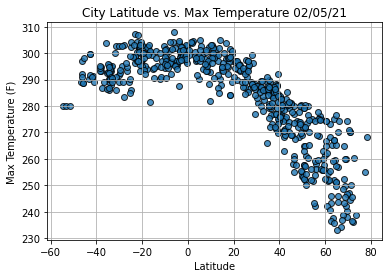

In [58]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

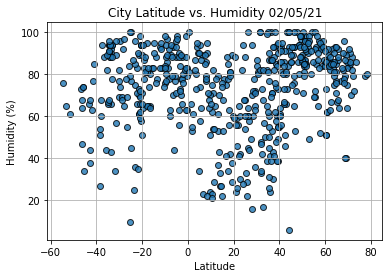

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

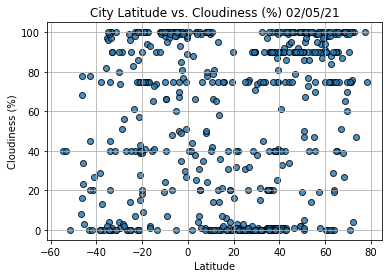

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

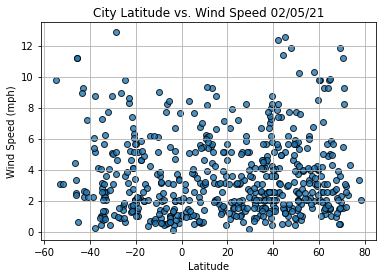

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [71]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [73]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

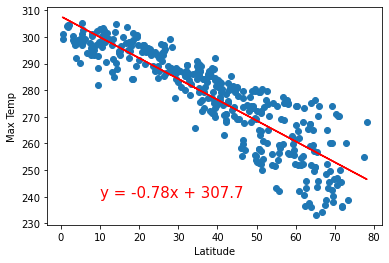

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,240))

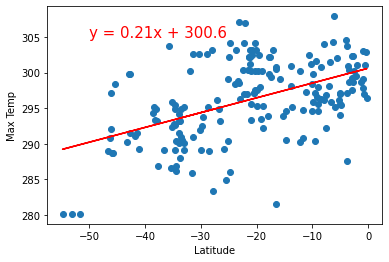

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,305))

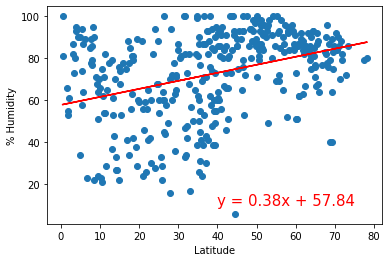

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

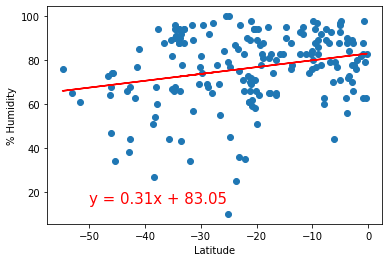

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

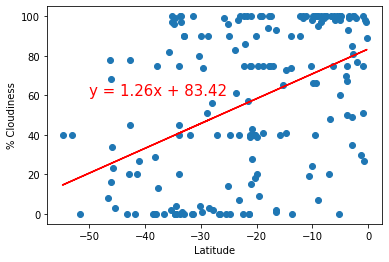

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

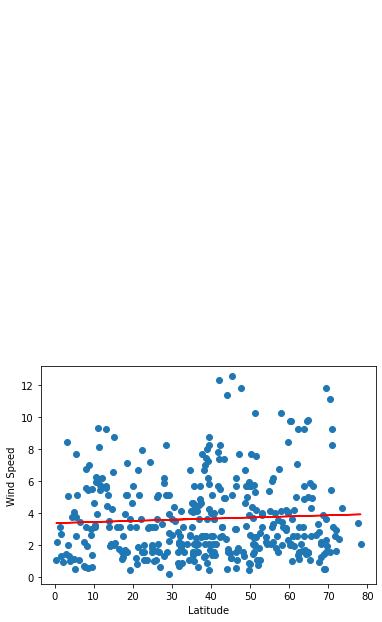

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

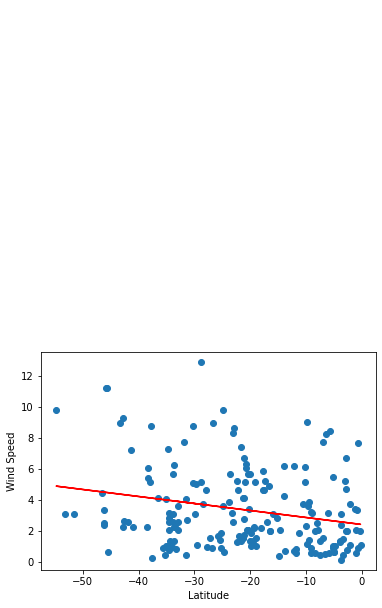

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))